### set folder_name and day session to analyze

In [1]:
name = 'ANB1'
session = '20231030_d5'

### imports

In [2]:
from scipy import io
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import statistics
import re
import glob
import scipy.signal as signal
import pickle

from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.align_times import get_leverdata_indices
from preprocess_leverdata.get_trial_frequencies import get_trial_frequencies
from preprocess_leverdata.butterworth_filter_leverdata import butterworth_filter_leverdata
from preprocess_leverdata.rescale_leverdata import rescale_leverdata
from preprocess_leverdata.view_processed_trial_FFT import view_processed_trial_FFT
from preprocess_leverdata.calculate_leverdata_sample_times import calculate_leverdata_sample_times

### Setup folders and matfiles

In [3]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscrimination/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

output_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
leverdata_matfile = "../Data_Copy/LeverData/"+name+"/LeverData_"+name+"_"+session+".mat"

respMTX shape: (183, 7)
MTXTrialType shape: (1000, 5)
number of trials: 183


In [4]:
open(leverdata_matfile)

<_io.TextIOWrapper name='../Data_Copy/LeverData/ANB1/LeverData_ANB1_20231030_d5.mat' mode='r' encoding='UTF-8'>

For mac:

In [5]:
!mkdir {output_folder}

mkdir: ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231030_d5/: File exists


For windows:

In [6]:
!mkdir "{output_folder}"

mkdir: ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231030_d5/: File exists


preview trials

In [7]:
np.set_printoptions(suppress = True,
   formatter = {'float_kind':'{:f}'.format})
print(respMTX[0:10])

[[1.659345 2.211614 1.000000 4.341687 -2.669569 0.000000 1.000000]
 [20.077773 20.485873 1.000000 22.334369 -2.669569 0.000000 1.000000]
 [46.024086 46.709723 0.000000 nan -2.669569 0.000000 0.000000]
 [56.133858 56.821427 1.000000 58.255389 -2.669569 0.000000 1.000000]
 [65.629801 66.315649 1.000000 66.698166 -2.669569 0.000000 1.000000]
 [92.512203 92.901771 1.000000 94.668988 -2.669569 0.000000 1.000000]
 [102.721900 103.196675 0.000000 nan -2.669569 0.000000 0.000000]
 [112.597165 113.252696 0.000000 nan -2.669569 0.000000 0.000000]
 [122.668091 123.253733 0.000000 nan -2.669569 0.000000 0.000000]
 [132.653062 133.299327 1.000000 136.837216 -2.669569 0.000000 1.000000]]


### Run leverdata2binary.cpp to create binary files for each trial from `lever_data` in the LeverData .mat file

In [8]:
!./preprocess_leverdata/leverdata2binary {output_folder} {leverdata_matfile} 100

leverdata from .mat size: 72000000,72000000
leverdata from .mat rank: 2
leverdata vector size: 72000000
leverdata vector with unused rows taken out size: 10274480
vector saved to .bin file ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231030_d5/full.bin
finished a trialITI: 91195 trialITI length: 91095 samples = ~15s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231030_d5/trial0.bin
finished a trialITI: 243822 trialITI length: 152627 samples = ~25s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231030_d5/trial1.bin
finished a trialITI: 303292 trialITI length: 59470 samples = ~10s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231030_d5/trial2.bin
finished a trialITI: 359150 trialITI length: 55858 samples = ~9s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231030_d5/trial3.bin
finished a trialITI: 517281 trialITI length: 158131

change `num_trials` if seems like `lever_data` stopped before behavior (if total trials detected is less than `num_trials` from `respMTX`)

In [9]:
num_trials = 183

### Look at sampling rates for the `lever_data`

In [10]:
dts, trial_frequencies = get_trial_frequencies(num_trials, respMTX, output_folder)

Trial  0
Duration in MATLAB seconds from respMTX:  18.4184281
Number of leverdata samples:  91095
Estimated freq:  4945.861802397784
Trial  1
Duration in MATLAB seconds from respMTX:  25.946313
Number of leverdata samples:  152627
Estimated freq:  5882.415740533154
Trial  2
Duration in MATLAB seconds from respMTX:  10.109772299999996
Number of leverdata samples:  59470
Estimated freq:  5882.427243193205
Trial  3
Duration in MATLAB seconds from respMTX:  9.495943099999998
Number of leverdata samples:  55858
Estimated freq:  5882.301464085227
Trial  4
Duration in MATLAB seconds from respMTX:  26.882401400000006
Number of leverdata samples:  158131
Estimated freq:  5882.324188493069
Trial  5
Duration in MATLAB seconds from respMTX:  10.2096971
Number of leverdata samples:  60057
Estimated freq:  5882.348850486465
Trial  6
Duration in MATLAB seconds from respMTX:  9.875265499999998
Number of leverdata samples:  58089
Estimated freq:  5882.272228528946
Trial  7
Duration in MATLAB seconds fr

Number of leverdata samples:  58430
Estimated freq:  5882.382491959845
Trial  13
Duration in MATLAB seconds from respMTX:  10.044435300000004
Number of leverdata samples:  59085
Estimated freq:  5882.361549981807
Trial  14
Duration in MATLAB seconds from respMTX:  8.626718100000005
Number of leverdata samples:  50744
Estimated freq:  5882.19058647575
Trial  15
Duration in MATLAB seconds from respMTX:  6.488167799999985
Number of leverdata samples:  38162
Estimated freq:  5881.783760278223
Trial  16
Duration in MATLAB seconds from respMTX:  14.204019799999998
Number of leverdata samples:  83555
Estimated freq:  5882.48968788399
Trial  17
Duration in MATLAB seconds from respMTX:  11.8059437
Number of leverdata samples:  69447
Estimated freq:  5882.376010314194
Trial  18
Duration in MATLAB seconds from respMTX:  10.028896400000008
Number of leverdata samples:  58993
Estimated freq:  5882.302264085603
Trial  19
Duration in MATLAB seconds from respMTX:  10.100115500000015
Number of leverdat

So if estimated frequencies are not all around 5882 Hz, then trials probably aren't aligned. Make sure files are correct, and try increasing the skipped samples in for the C++ trial detection program. Also make sure the statistics are all between 4500 and 5900.

### low pass Butterworth filter `lever_data` with a cutoff frequency of 40 Hz

Assuming electrical noise will be around 60 Hz

In [11]:
cutoff_frequency = 40
butterworth_filter_leverdata(output_folder, num_trials, cutoff_frequency)

### Rescale the filtered_lever_data to 0-5V from 0-1023 analogRead values

In [12]:
rescale_leverdata(output_folder, num_trials)

### Calculate sample time values for each sample based on trial start times

In [13]:
calculate_leverdata_sample_times(output_folder, respMTX, num_trials)

### Get tone and leverpress sample indicies

In [14]:
get_leverdata_indices(output_folder, respMTX, num_trials)

### Check the FFT power spectrum for one of the trials

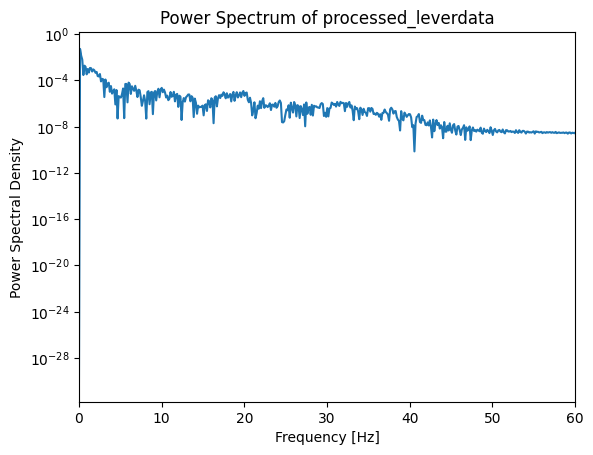

In [15]:
# set which trial to look at
trial_index = 10
view_processed_trial_FFT(trial_index, output_folder)